In [207]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#  Import SK-Learn Library
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score , classification_report
from sklearn.preprocessing import StandardScaler

In [152]:
target_url = (r"A:\launch_code_STL\Final_Homework\week-17\abalone.data")

In [ ]:
#There are no column labels in the data, so we copy them from the documentation and use pandas to read and print few lines 
# of the dataset

In [153]:
column_names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]
abalone_data = pd.read_csv(target_url, names=column_names)
print("Number of samples: %d" % len(abalone_data))
abalone_data.head()

Number of samples: 4177


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [154]:
# As Rings: +1.5 gives the age in years , So we will replace rings with age
abalone_data['Age'] = abalone_data['rings'] + 1.5

#  Now we will drop Rings
abalone_data.drop('rings', axis=1, inplace=True)
abalone_data.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [155]:
# checking for any null-values
abalone_data.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole weight      0
shucked weight    0
viscera weight    0
shell weight      0
Age               0
dtype: int64

In [156]:
# Get information about our data frame
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole weight    4177 non-null   float64
 5   shucked weight  4177 non-null   float64
 6   viscera weight  4177 non-null   float64
 7   shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [157]:
# Hence no null value, now we can do data visualization now look at statistics of the dataset
abalone_data.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [158]:
# from the above statistics  we can see, the feature Height is having the minimum value as '0'. There are some zero values 
#in height feature so checking the 'height' feature.

abalone_data[abalone_data.height == 0]

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,Age
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,9.5
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,7.5


In [ ]:
# There are only two rows with zero values. We can remove these two rows from our dataset and consider the rest of the data
# for the model.

In [159]:
abalone_df = abalone_data[abalone_data.height != 0]
# abalone_df.describe()
# abalone_df['height'].describe()

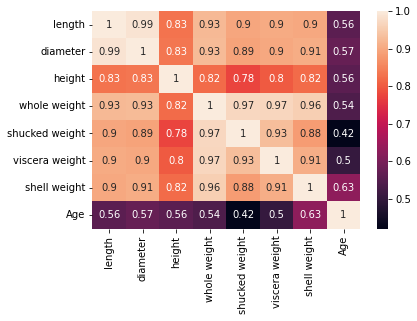

In [160]:
sns.heatmap(abalone_df.corr(),annot=True)
plt.show()

Inference:

Viscera weight and Shucked weight have highest +ve correlation with all features

Age(Our output variable) has +ve corr with all features. max corr with 'Shell weight'

In [161]:
one_hot_encoders_abalone_df =  pd.get_dummies(abalone_data)
cols = one_hot_encoders_abalone_df.columns
abalone_clean_data = pd.DataFrame(one_hot_encoders_abalone_df,columns= cols)
abalone_clean_data.head(1)

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,Age,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,16.5,0,0,1


In [162]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
scaled_data =  pd.DataFrame(
    sc_X.fit_transform(abalone_clean_data[['length','diameter','height','whole weight','shucked weight','viscera weight']]),
                           columns=['length','diameter','height','whole weight','shucked weight','viscera weight'],
                           index=abalone_clean_data.index)

In [163]:
scaled_data.head()

,length,diameter,height,whole weight,shucked weight,viscera weight
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337


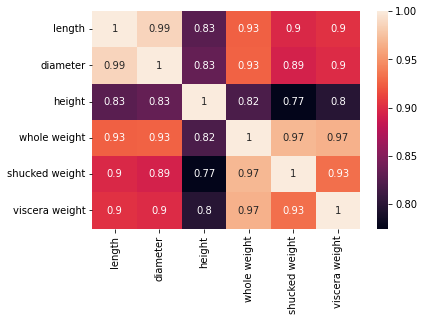

In [164]:
sns.heatmap(scaled_data.corr(),annot=True)
plt.show()

In [165]:
# When deep=True (default), a new object will be created with a copy of the calling object’s data and indices.
# Modifications to the data or indices of the copy will not be reflected in the original object
abalone_clean_data_standard = abalone_clean_data.copy(deep=True)
abalone_clean_data_standard[['length','diameter','height','whole weight','shucked weight','viscera weight']] = scaled_data[['length','diameter','height','whole weight','shucked weight','viscera weight']]

In [202]:
abalone_clean_data_standard.head()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,Age,sex_F,sex_I,sex_M
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,0.150,16.5,0,0,1
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,0.070,8.5,0,0,1
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,0.210,10.5,1,0,0
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,0.155,11.5,0,0,1
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,0.055,8.5,0,1,0


In [228]:
feature_columns =['length','diameter','height','whole weight','shucked weight','viscera weight','shell weight','sex_F','sex_I','sex_M']

In [229]:
X = abalone_clean_data_standard[feature_columns]
y = abalone_clean_data_standard.Age
# y is float value and we will categorize ouput in two categories 0 and 1
# y = np.where(y > 10,1,0)

In [230]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 23)

In [231]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

ValueError: Unknown label type: 'continuous'

In [171]:
print("accuracy: "+ str(accuracy_score(y_test,y_pred)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(y_test,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_test,y_pred)))
print("R2 score: {}".format(r2_score(y_test, y_pred)))
print("intercept: {}".format(logreg.intercept_))

accuracy: 85.8054226475279%
Mean absolute error: 0.1419457735247209
Mean squared error: 0.1419457735247209
R2 score: 0.3642567444403937
intercept: [0.6667443]


In [172]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77       422
           1       0.86      0.93      0.90       832

    accuracy                           0.86      1254
   macro avg       0.85      0.82      0.83      1254
weighted avg       0.86      0.86      0.85      1254



In [206]:
from sklearn.tree import DecisionTreeRegressor
# create an estimator, optionally specifying parameters
model = DecisionTreeRegressor()
# fit the estimator to the data
model.fit(X_train, y_train)
# apply the model to the test and training data
predicted_test_y = model.predict(X_test)
predicted_train_y = model.predict(X_train)

acc = accuracy_score(y_test, predicted_test_y)
print("Test set accuracy: {:.2f}".format(acc))
print('Training Accuracy:', round(model.score(X_train, predicted_train_y),4))
print('Testing Accuracy: ', round(model.score(X_test, predicted_test_y),4))

ValueError: continuous is not supported

In [119]:
from sklearn.tree import DecisionTreeClassifier
# Import accuracy_score
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()
# training classifier
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: \n{confusionMatrix}')

Test set accuracy: 0.81
Confusion Matrix: 
[[293 129]
 [110 722]]


In [146]:
# from sklearn.model_selection import GridSearchCV
# params = {'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],'max_features':[2,4, 6, 8]}
# CV= GridSearchCV(dt, param_grid = params, scoring = 'accuracy', cv = 10)
# CV.fit(X_train, y_train)
# #
# # best parameters and also the best score
# print("Tuned Linear Regression Parameters: {}".format(CV.best_params_))
# print("Best score is {}".format(CV.best_score_))

In [123]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [113]:
# from sklearn.tree import export_graphviz
# from six import StringIO
# from IPython.display import Image  
# import pydotplus
# import graphviz
# # import os
# # os.environ["PATH"] += os.pathsep + r'the Graphviz bin file address on your system'

# # import os
# # os.environ["PATH"] += os.pathsep + r'c:\users\rsagu\appdata\local\programs\python\python39\lib\site-packages (0.19.1)'


# dot_data = StringIO()
# export_graphviz(dt, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = feature_columns,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('abolone.png')
# Image(graph.create_png())


In [149]:
from sklearn.tree import DecisionTreeClassifier
# Import accuracy_score
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=0, max_depth = 3)
# training classifier
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))


# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))
print('Training Accuracy:', round(dt.score(X_train, y_train),4))
print('Testing Accuracy: ', round(dt.score(X_test, y_test),4))

# from sklearn.metrics import confusion_matrix
# confusionMatrix = confusion_matrix(y_test, y_pred)
# print(f'Confusion Matrix: \n{confusionMatrix}')

Test set accuracy: 0.84
Test set RMSE of rf: 0.41
Training Accuracy: 0.8351
Testing Accuracy:  0.8357


In [135]:
# Import necessary modules
from scipy.stats import randint
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV


# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [5, None],
              "max_features": randint(1, 11),
              "min_samples_leaf": randint(1, 11),
              "criterion": ["gini", "entropy"],
             "splitter": ["best", "random"]}

# Instantiate a Decision Tree classifier: tree
tree = tree.DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 6, 'min_samples_leaf': 1, 'splitter': 'best'}
Best score is 0.8333901182531319


In [144]:
from sklearn.tree import DecisionTreeRegressor
param_grid = [
    {'criterion':["squared_error", "friedman_mse", "absolute_error", "poison"], 'max_features':[2, 4, 6, 8]},
]

dt = DecisionTreeRegressor(max_depth = 4, min_samples_leaf=0.26, random_state=25)
dt_grid = GridSearchCV(dt, param_grid, cv=5, scoring="neg_mean_squared_error")
dt_grid.fit(X_train, y_train)


# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(dt_grid.best_params_))
print("Best score is {}".format(dt_grid.best_score_))

# y_pred = dt.predict(X_test)

# print('Training Accuracy:', round(dt.score(X_train, y_train),4))
# print('Testing Accuracy: ', round(dt.score(X_test, y_test),4))
# print("Best score is {}".format(dt.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'squared_error', 'max_features': 4}
Best score is -0.13942578789000343


C:\Users\rsagu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rsagu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rsagu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Users\rsagu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py", lin

In [ ]:
*************************************************************************************************************************

In [150]:
from sklearn.tree import DecisionTreeClassifier
# Import accuracy_score
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=0, max_depth = 3)
# training classifier
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))


# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))
print('Training Accuracy:', round(dt.score(X_train, y_train),4))
print('Testing Accuracy: ', round(dt.score(X_test, y_test),4))

# from sklearn.metrics import confusion_matrix
# confusionMatrix = confusion_matrix(y_test, y_pred)
# print(f'Confusion Matrix: \n{confusionMatrix}')

Test set accuracy: 0.84
Test set RMSE of rf: 0.41
Training Accuracy: 0.8351
Testing Accuracy:  0.8357


In [132]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train)

# Predict the test set labels
y_pred = rf.predict(X_test)

# # Compute test set accuracy  
# acc = accuracy_score(y_test, y_pred)
# print("Test set accuracy: {:.2f}".format(acc))

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))
print('Training Accuracy:', round(rf.score(X_train, y_train),4))
print('Testing Accuracy: ', round(rf.score(X_test, y_test),4))

Test set RMSE of rf: 0.33
Training Accuracy: 0.9176
Testing Accuracy:  0.5229


In [127]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, 
            n_estimators=200,
            random_state=2)

# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))
print('Training Accuracy:', round(gb.score(X_train, y_train),4))
print('Testing Accuracy: ', round(gb.score(X_test, y_test),4))

Test set RMSE of gb: 0.328
Training Accuracy: 0.7932
Testing Accuracy:  0.5182
